# Classification

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

#### 1. Carregar dados

In [2]:
df = pd.read_excel("./data/L01-data-first projects.xlsx", sheet_name='car sales-historical data')

df.head()

,Bought?,Age,Income,Family size,Cars bought previously,Value of last purchase
0,nao,37,49000,2,1,42000
1,sim,43,68000,3,0,0
2,sim,42,61000,4,0,0
3,sim,26,52000,2,0,0
4,sim,40,64000,1,1,21000


In [3]:
df.tail()

,Bought?,Age,Income,Family size,Cars bought previously,Value of last purchase
70,nao,53,27000,1,0,0
71,sim,45,33000,2,1,40000
72,sim,50,27000,2,1,36000
73,sim,59,56000,1,1,42000
74,nao,59,35000,2,0,0


#### 2. Definir variáveis independentes e variável dependente

In [4]:
# variáveis independentes

X = df.iloc[:, 1:]

In [5]:
# variável dependente

y = df.iloc[:, 0]

In [6]:
# podíamos usar 'nao' e 'sim'
# mas assim torna-se mais fácil identificar os valores e a respectiva classe nas representações gráficas

y.replace(['nao', 'sim'], [0, 1], inplace=True)

#### 3. Classificação com árvores de decisão

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
tree_clf = DecisionTreeClassifier(max_depth = 10, 
                                  min_samples_leaf = 2, 
                                  min_samples_split = 4, 
                                  random_state = 42)

In [9]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

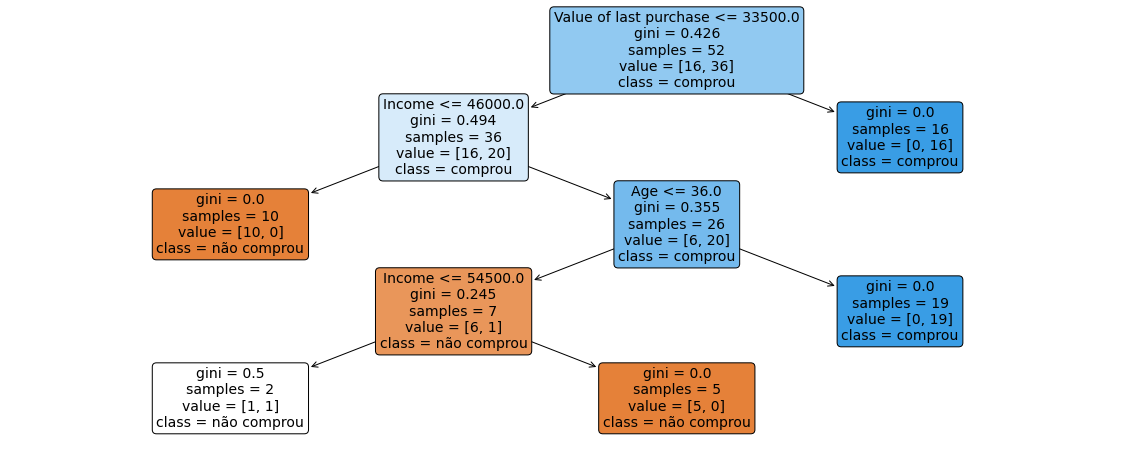

In [10]:
plt.figure(figsize=(20,8))
plot_tree(tree_clf, 
          feature_names = X.columns, 
          class_names = ['não comprou', 'comprou'], # nome das classes por ordem numérica ascendente
          filled = True, 
          rounded = True);

#### 4. Prever valores para a classe com o test set

In [11]:
predictions = tree_clf.predict(X_test)

In [12]:
predictions

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1], dtype=int64)

In [13]:
y_test.values

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1], dtype=int64)

As nossas previsões são muito semelhantes aos verdadeiros valores, embora essa previsão não esteja correta em alguns casos.

Podemos avaliar o nosso modelo com mais detalhe utilizando a **matriz de confusão** e métricas como ***precision***, ***recall*** e ***F1-score***. Esta última combina as 2 métricas anteriores.

#### 5. Avaliação do modelo

In [14]:
print(confusion_matrix(y_test, predictions))

[[ 8  1]
 [ 1 13]]


Apenas 2 observações foram incorretamente classificadas. Podemos ainda representar esta matriz de confusão graficamente.

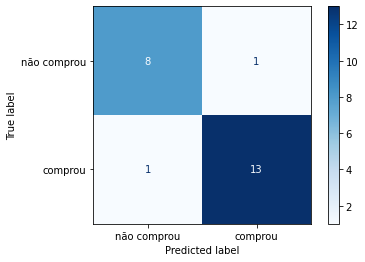

In [15]:
plot_confusion_matrix(tree_clf, X_test, y_test, display_labels = ['não comprou', 'comprou'], cmap = plt.cm.Blues);

In [16]:
print(accuracy_score(y_test, predictions))

0.9130434782608695


In [17]:
# accuracy

(13 + 8) / (13 + 8 + 1 + 1)

0.9130434782608695

In [18]:
print(classification_report(y_test, predictions, target_names = ['não comprou', 'comprou']))

              precision    recall  f1-score   support

 não comprou       0.89      0.89      0.89         9
     comprou       0.93      0.93      0.93        14

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23

